# 1. Setup Env

In [24]:
# pip install Flask-SQLAlchemy
# pip install ipywidgets   OR  # conda install ipywidgets

# Active jupyter nbextension
# jupyter nbextension enable --py widgetsnbextension

In [98]:
import pandas as pd
import numpy as np
#from pandas_alchemy import init_db, DataFrame
from flask_sqlalchemy import SQLAlchemy
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


# 2. Data Shape

In [53]:
fbData=pd.read_csv("/Users/Sunny_Charlie/Desktop/AI_Project_Code/13_DataMeshNetwork/FB_Data/pseudo_facebook.csv")

In [54]:
fbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [55]:
fbData

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [56]:
fbData.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [57]:
fbData['age'].describe()

count    99003.000000
mean        37.280224
std         22.589748
min         13.000000
25%         20.000000
50%         28.000000
75%         50.000000
max        113.000000
Name: age, dtype: float64

In [59]:
fbData.nunique()

userid                   99003
age                        101
dob_day                     31
dob_year                   101
dob_month                   12
gender                       2
tenure                    2426
friend_count              2562
friendships_initiated     1519
likes                     2924
likes_received            2681
mobile_likes              2396
mobile_likes_received     2004
www_likes                 1726
www_likes_received        1636
dtype: int64

In [60]:
fbData['gender'].value_counts()

male      58574
female    40254
Name: gender, dtype: int64

In [61]:
fbData['gender'].value_counts(dropna=False)

male      58574
female    40254
NaN         175
Name: gender, dtype: int64

In [62]:
#divided the age into a group of 10. see last column 
ageLabels=['0-10', '10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
fbData['age_group'] = pd.cut(fbData.age, bins=np.arange(0,121,10),labels=ageLabels,right=True)
fbData.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,10-20


# 3. Data Visulization

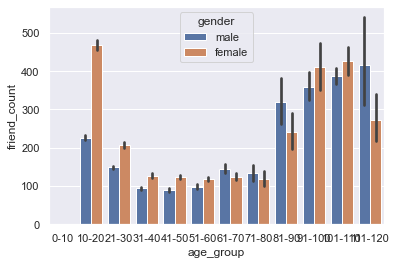

In [99]:
sb.barplot(x=fbData['age_group'],y=fbData['friend_count'],hue=fbData.gender)

In [100]:
# Create 'year_group'
tenlabel=['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
fbData['year_group']=pd.cut(fbData.tenure,bins=np.arange(0,3300,365),labels=tenlabel,right=True)

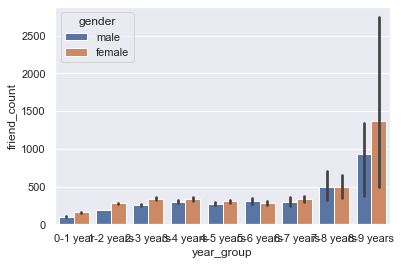

In [101]:
sb.barplot(x=fbData['year_group'],y=fbData['friend_count'], hue=fbData.gender)

In [102]:
fbData.year_group.fillna(value='0-1 year',inplace=True)

In [103]:
fbData.year_group.value_counts(dropna=False)

0-1 year     43660
1-2 years    33366
2-3 years     9860
3-4 years     5448
4-5 years     4557
5-6 years     1507
6-7 years      581
7-8 years       15
8-9 years        9
Name: year_group, dtype: int64

In [104]:
fbData.age_group.value_counts()

21-30      28646
10-20      24752
31-40      12491
51-60       9319
41-50       8968
61-70       6855
101-110     3449
71-80       2249
91-100      1219
81-90        817
111-120      238
0-10           0
Name: age_group, dtype: int64

In [105]:
fbData.sort_values(by='likes_received',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,likes_received_pday,likes_per_day
94906,1674584,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years,651,3
77121,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year,704,8
98822,1715925,23,4,1990,9,female,705.0,4077,793,1877,152014,80,89911,1797,62103,21-30,1-2 years,216,3
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,10-20,1-2 years,264,18
98878,1053087,23,6,1990,6,male,596.0,4320,836,2996,82623,179,43410,2817,39213,21-30,1-2 years,139,5
49230,1432020,20,12,1993,1,male,245.0,79,50,477,53534,78,30387,399,23147,10-20,0-1 year,219,2
98773,2042824,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year,1039,26
98937,1559908,20,4,1993,12,female,1334.0,4622,1819,4280,45633,472,30754,3808,14879,10-20,3-4 years,34,3
98936,1781243,17,1,1996,5,female,976.0,3683,755,10478,42449,246,27353,10232,15096,10-20,2-3 years,43,11
98686,1015907,74,27,1939,11,male,832.0,4630,831,966,39536,941,10199,25,29337,71-80,2-3 years,48,1


In [106]:
#Calculating likes received per day
fbData['likes_received_pday']=fbData.likes_received/fbData.tenure.where(fbData.tenure>0)
fbData['likes_received_pday']=round(fbData['likes_received_pday'])
fbData.likes_received_pday.fillna(value=0,inplace=True)
fbData.likes_received_pday=fbData.likes_received_pday.astype(int)

In [107]:
#Calculating likes  per day
fbData['likes_per_day']=fbData.likes/fbData.tenure.where(fbData.tenure>0)
fbData['likes_per_day']=round(fbData['likes_per_day'])
fbData.likes_per_day.fillna(value=0,inplace=True)
fbData.likes_per_day=fbData.likes_per_day.astype(int)

In [108]:
fbData.sort_values(by='likes_received_pday',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,likes_received_pday,likes_per_day
94996,1149300,24,7,1989,3,female,2.0,834,104,2169,5404,2169,1520,0,3884,21-30,0-1 year,2702,1084
94057,2175941,18,25,1995,2,male,2.0,640,299,5640,2542,4251,1587,1389,955,10-20,0-1 year,1271,2820
98773,2042824,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039,10-20,0-1 year,1039,26
77121,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,10-20,0-1 year,704,8
94906,1674584,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,10-20,1-2 years,651,3
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,10-20,0-1 year,639,210
61145,1409983,47,8,1966,10,female,4.0,123,61,3331,1200,3331,468,0,732,41-50,0-1 year,300,833
98994,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,10-20,1-2 years,264,18
76025,1494406,17,1,1996,1,female,2.0,215,185,292,478,292,244,0,234,10-20,0-1 year,239,146
75126,1546811,39,11,1974,12,female,29.0,212,145,8091,6730,3181,2457,4910,4273,31-40,0-1 year,232,279


In [109]:
fbData.sort_values(by='likes_per_day',ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,likes_received_pday,likes_per_day
94057,2175941,18,25,1995,2,male,2.0,640,299,5640,2542,4251,1587,1389,955,10-20,0-1 year,1271,2820
94996,1149300,24,7,1989,3,female,2.0,834,104,2169,5404,2169,1520,0,3884,21-30,0-1 year,2702,1084
61145,1409983,47,8,1966,10,female,4.0,123,61,3331,1200,3331,468,0,732,41-50,0-1 year,300,833
69227,1663659,27,2,1986,10,male,37.0,164,54,11396,8534,11396,6599,0,1935,21-30,0-1 year,231,308
75126,1546811,39,11,1974,12,female,29.0,212,145,8091,6730,3181,2457,4910,4273,31-40,0-1 year,232,279
79093,1411625,17,8,1996,9,male,33.0,250,190,7018,4892,7018,4744,0,148,10-20,0-1 year,148,213
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,10-20,0-1 year,639,210
66231,1523193,16,6,1997,1,male,11.0,150,70,2121,425,2121,391,0,34,10-20,0-1 year,39,193
79073,1038038,21,5,1992,5,female,12.0,242,238,2194,1214,237,657,1957,557,21-30,0-1 year,101,183
84115,1597681,33,28,1980,7,female,38.0,319,113,6907,4600,0,1843,6907,2757,31-40,0-1 year,121,182


Text(0.5, 1.0, 'Daily Likes received by Age Group')

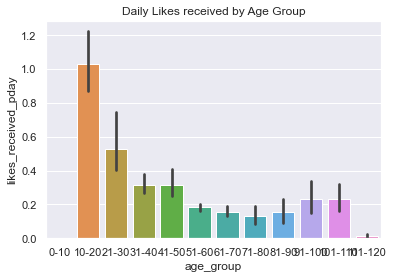

In [110]:
ax =sb.barplot(x='age_group', y='likes_received_pday', data=fbData)
ax.set_title('Daily Likes received by Age Group')

Text(0.5, 1.0, 'Daily Likes by Age Group')

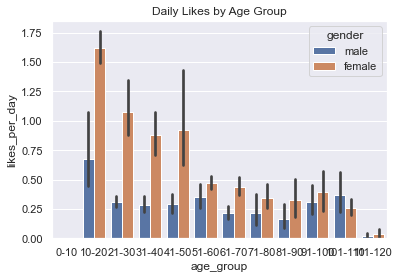

In [111]:
ax =sb.barplot(x='age_group', y='likes_per_day', data=fbData, hue=fbData.gender)
ax.set_title('Daily Likes by Age Group')

Text(0.5, 1.0, 'Daily Likes received by Age Group')

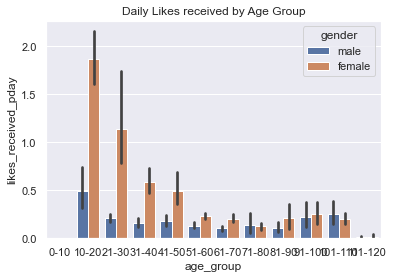

In [112]:
ax =sb.barplot(x='age_group', y='likes_received_pday', data=fbData, hue=fbData.gender)
ax.set_title('Daily Likes received by Age Group')

In [113]:
fbData.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,likes_received_pday,likes_per_day
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,61-70,1-2 years,33,7
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,10-20,0-1 year,639,210
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,10-20,0-1 year,113,108
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,21-30,1-2 years,16,11
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913,31-40,1-2 years,31,24


Text(0.5, 1.0, 'Friend count by Age')

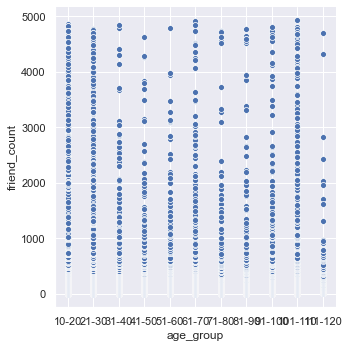

In [114]:
sb.set(style ="darkgrid")
sb.relplot(x ="age_group", y ="friend_count",
            data = fbData)
ax.set_title('Friend count by Age')

In [126]:
# Set the resolution of the picture
plt.figure(figsize=(20,12))

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

Text(0.5, 1.0, '#friend by Age Group')

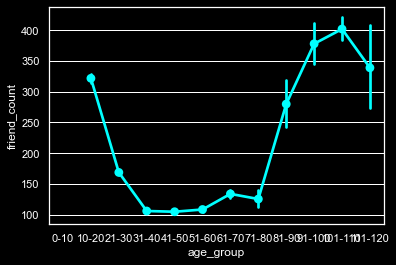

In [125]:
plt.style.use('dark_background')
sb.pointplot(x='age_group', y='friend_count', data=fbData, color='aqua')
ax.set_title('#friend by Age Group')

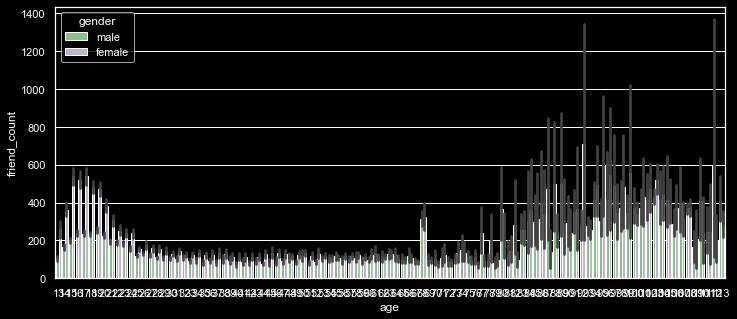

In [138]:
plt.figure(figsize=(12,5))
sb.barplot(x='age',y='friend_count',data=fbData,color='green', palette='Accent', hue=fbData.gender)

Text(0.5, 1.0, 'Friends counts by Age')

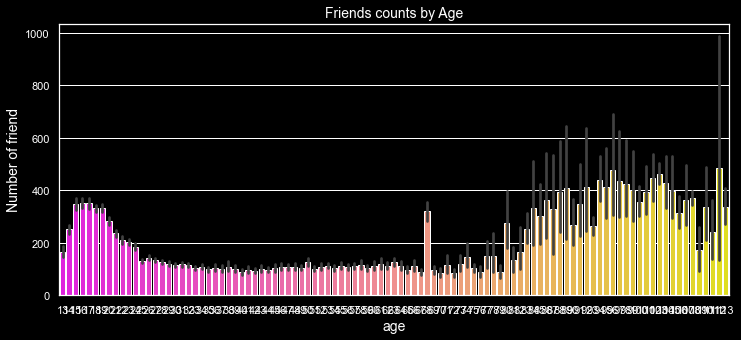

In [142]:
plt.figure(figsize=(12,5))
sb.barplot(x='age',y='friend_count',data=fbData,color='green', palette='spring')
plt.xlabel("age",fontsize=14)
plt.ylabel("Number of friend",fontsize=14)
plt.title('Friends counts by Age',fontsize=14)

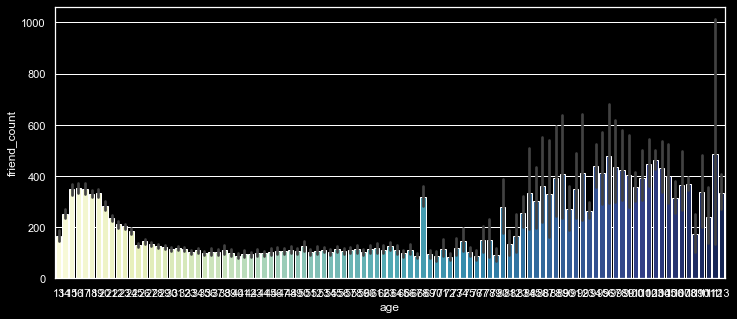

In [137]:
plt.figure(figsize=(12,5))
sb.barplot(x='age',y='friend_count',data=fbData,color='green', palette='YlGnBu')

/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


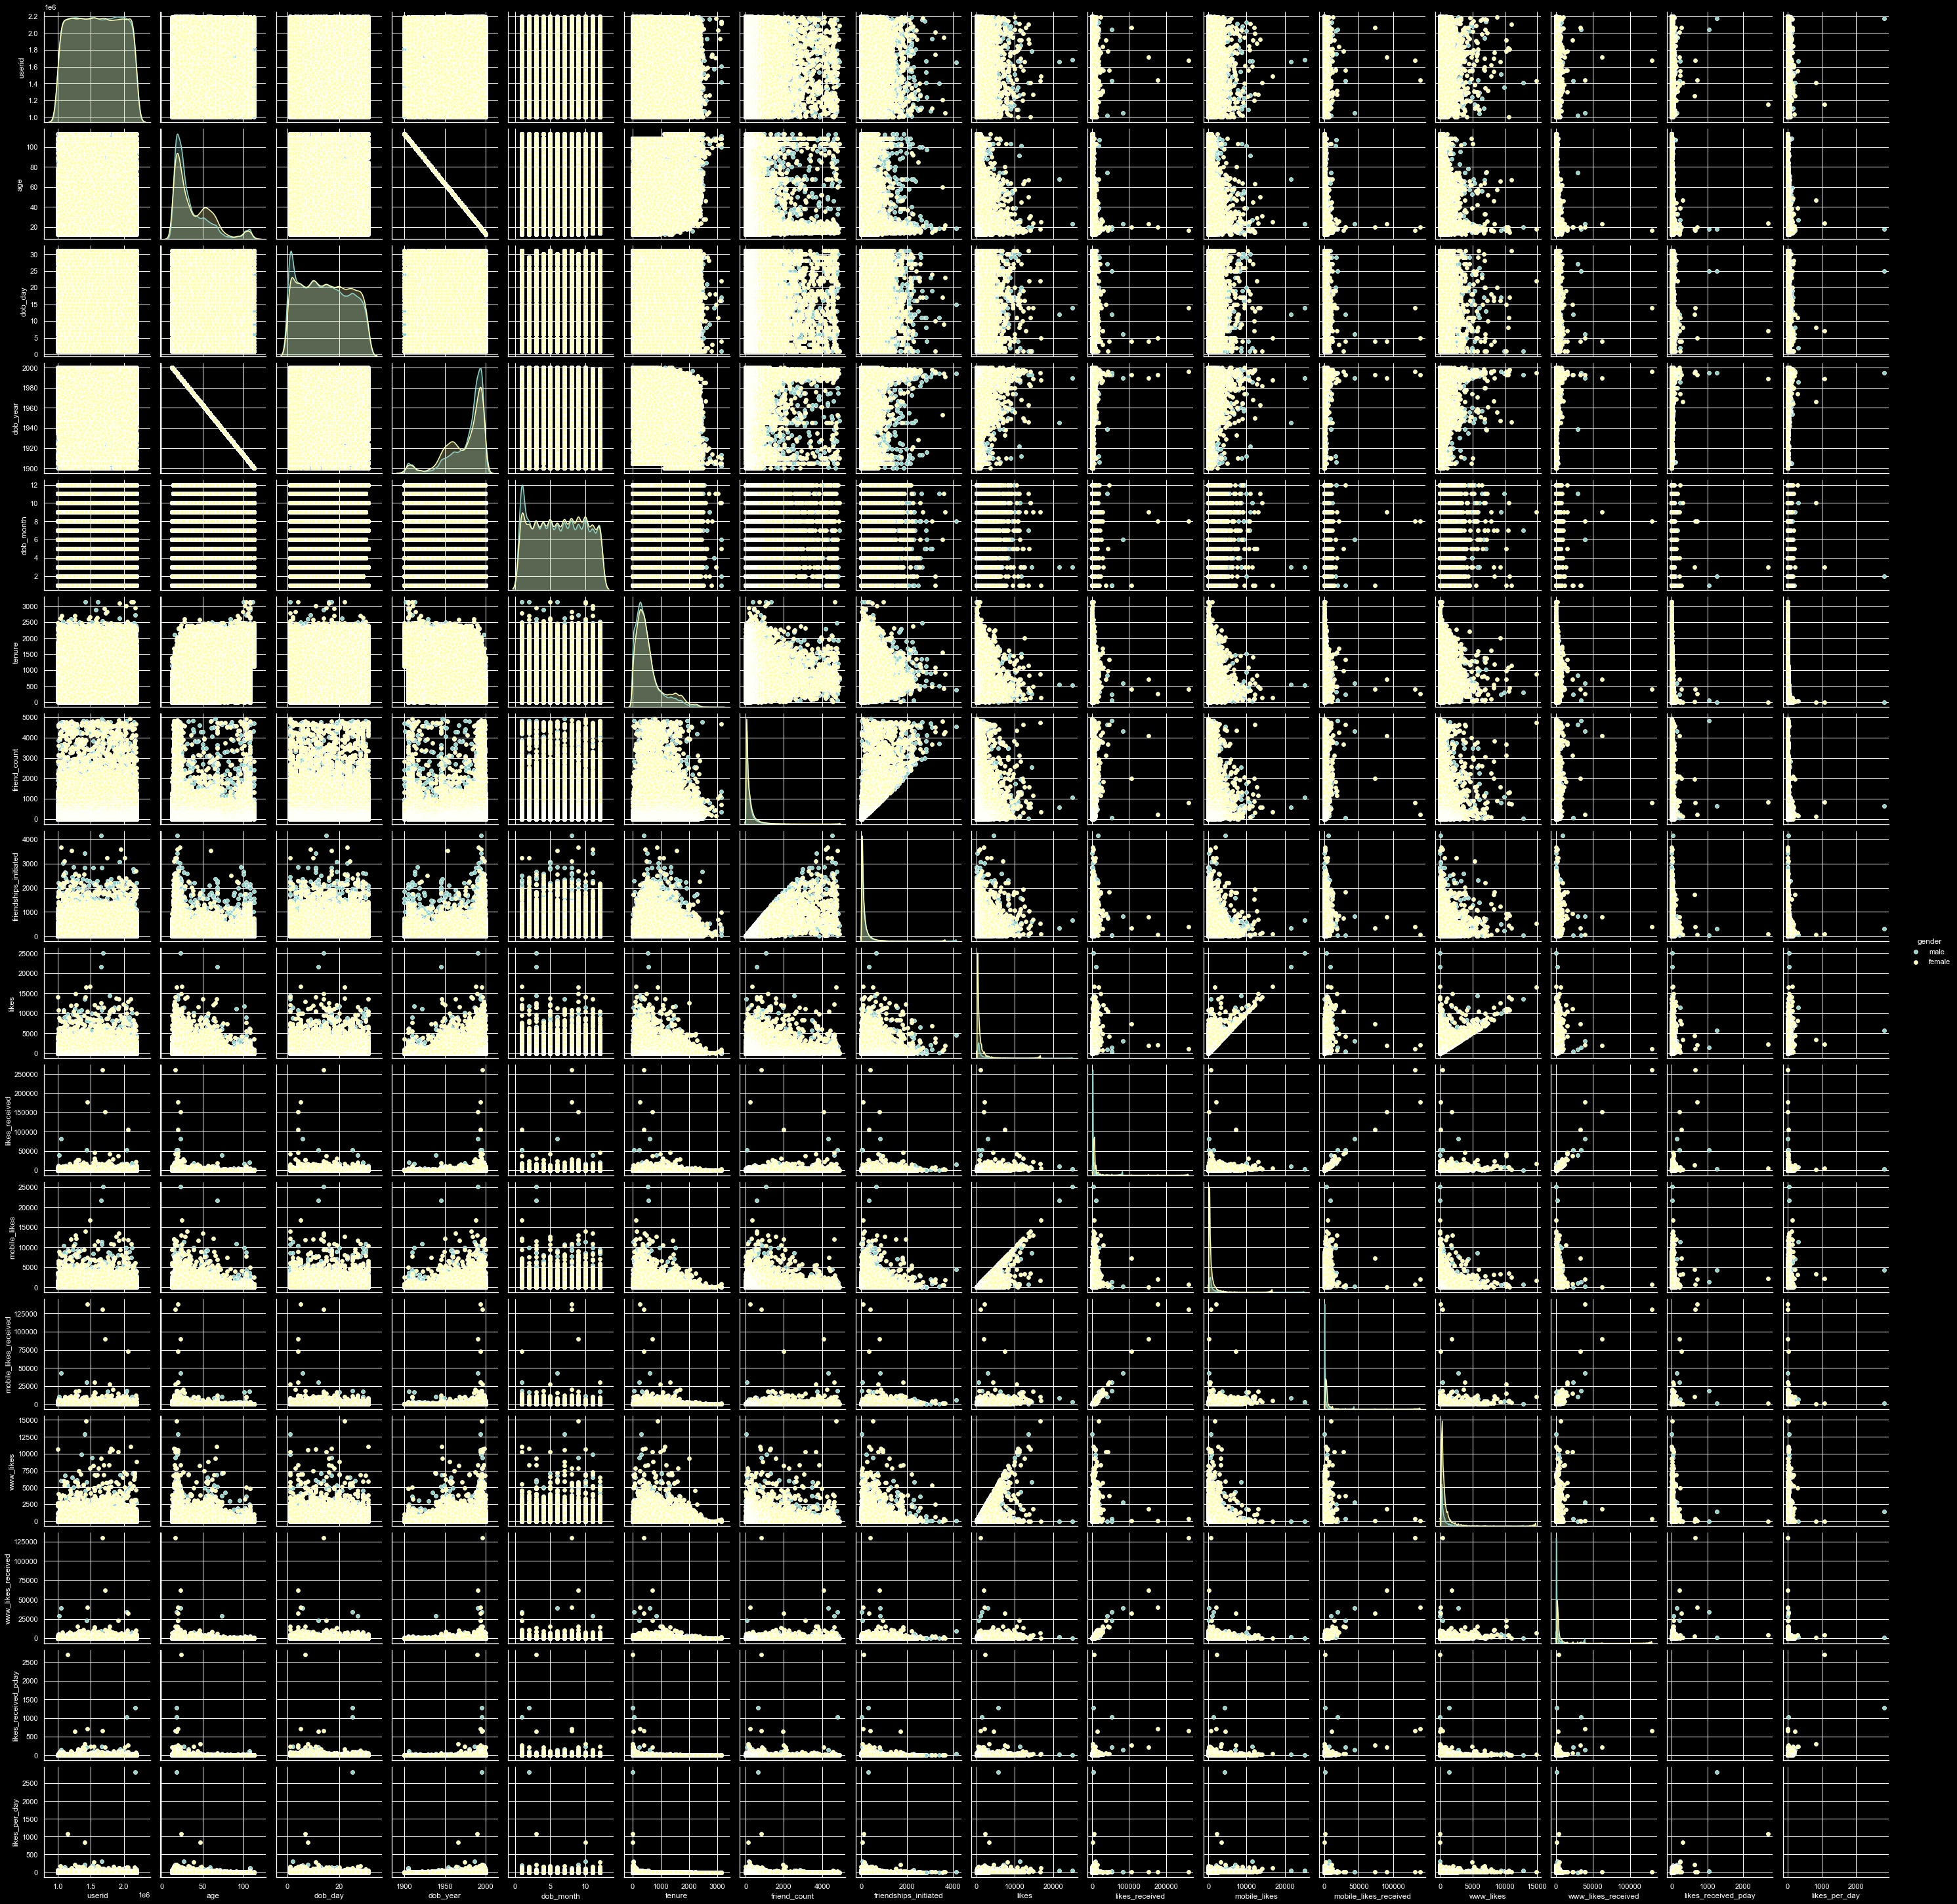

In [145]:
sb.pairplot(data = fbData, hue="gender")

In [ ]:
sb.pairplot(data = fbData, hue="age")

/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, Use

/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, Use

/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, Use

/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, Use

/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, Use

/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, Use

/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/Sunny_Charlie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, Use

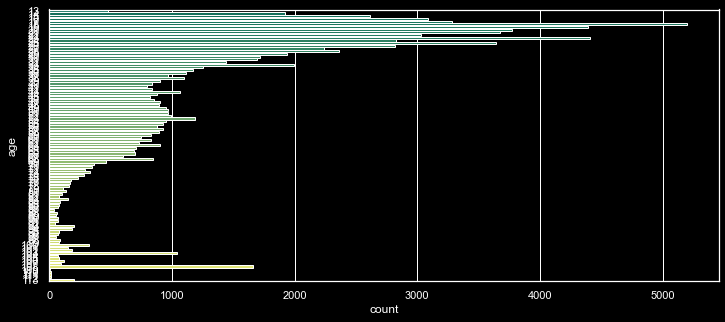

In [151]:
plt.figure(figsize=(12,5))
sb.countplot(y='age',data=fbData, palette='summer')

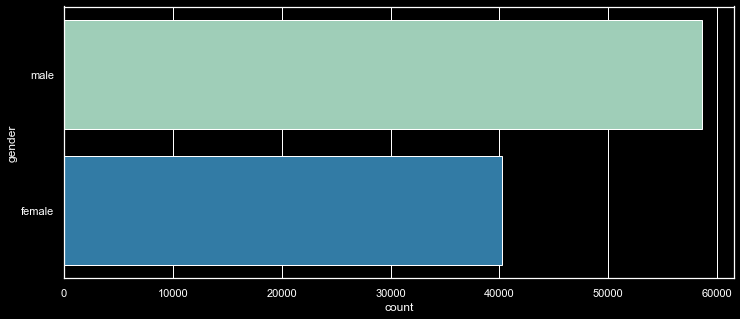

In [154]:
plt.figure(figsize=(12,5))
sb.countplot(y='gender',data=fbData, palette='YlGnBu')

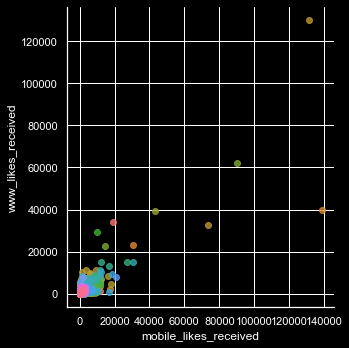

In [155]:
sb.lmplot( x="mobile_likes_received", y="www_likes_received", data=fbData, fit_reg=False, hue='tenure', legend=False)

In [ ]:
plt.figure(figsize=(12,5))
sb.countplot(y='age',data=fbData,palette='Set1')

In [81]:
@interact
def user_age(column='age', x=100):
    return fbData.loc[fbData['age'] > x]

interactive(children=(Text(value='age', description='column'), IntSlider(value=100, description='x', max=300, …

In [82]:
@interact
def user_age(column='friend_count', x=2000):
    return fbData.loc[fbData['friend_count'] > x]

interactive(children=(Text(value='friend_count', description='column'), IntSlider(value=2000, description='x',…

In [83]:
fb_gender = fbData.groupby('gender', as_index=False).sum() 
fb_gender

,gender,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,likes_received_pday,likes_per_day
0,female,64315395060,1588419,605326,79442883,259068,23637151.0,9740258,4584894,10468106,10121282,6960437,5921399,3507665,4199879,36418,38994
1,male,93520103528,2089349,830938,115820113,362042,29298972.0,9666787,6037023,4959923,3977851,3529747,2391753,1430175,1586098,15252,23054


Text(0.5, 1.0, 'Friend count by Gender')

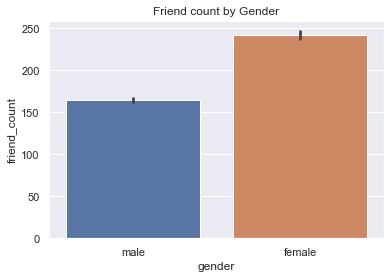

In [84]:
ax =sb.barplot(x='gender', y='friend_count', data=fbData)
ax.set_title('Friend count by Gender')

Text(0.5, 1.0, 'Friend count by Age')

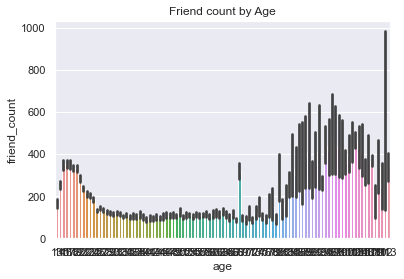

In [85]:
ax =sb.barplot(x='age', y='friend_count', data=fbData)
ax.set_title('Friend count by Age')

Text(0.5, 1.0, 'Friend count by Age')

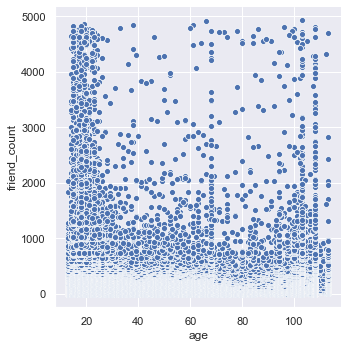

In [86]:
sb.set(style ="darkgrid")
sb.relplot(x ="age", y ="friend_count",
            data = fbData)
ax.set_title('Friend count by Age')

In [87]:
#sb.relplot(x ="age", y ="friend_count", hue ="CYLINDERS", data = fbData);

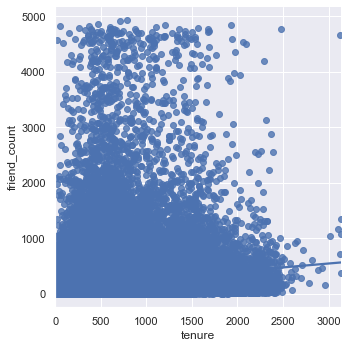

In [88]:
sb.lmplot(x = "tenure",
            y = "friend_count", 
            ci = None,
            data = fbData)

Text(0.5, 1.0, 'Likes received by Gender')

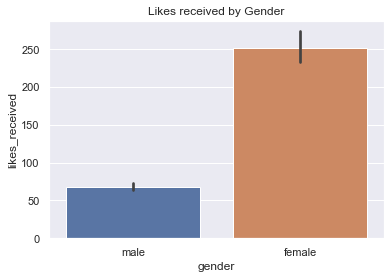

In [89]:
ax =sb.barplot(x='gender', y='likes_received', data=fbData)
ax.set_title('Likes received by Gender')

Text(0.5, 1.0, 'Likes give out by Gender')

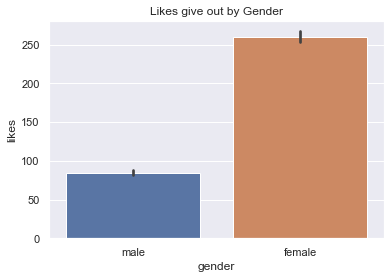

In [90]:
ax =sb.barplot(x='gender', y='likes', data=fbData)
ax.set_title('Likes give out by Gender')

Text(0.5, 1.0, 'Likes give out by Age')

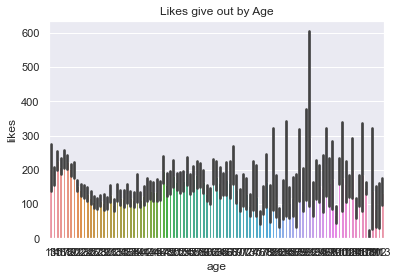

In [91]:
ax =sb.barplot(x='age', y='likes', data=fbData)
ax.set_title('Likes give out by Age')

Text(0.5, 1.0, 'Likes_received by Age')

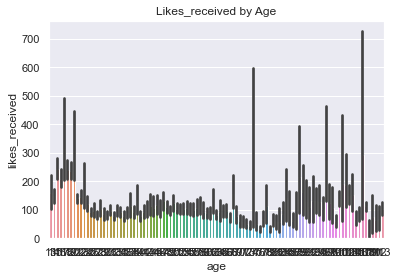

In [92]:
ax =sb.barplot(x='age', y='likes_received', data=fbData)
ax.set_title('Likes_received by Age')

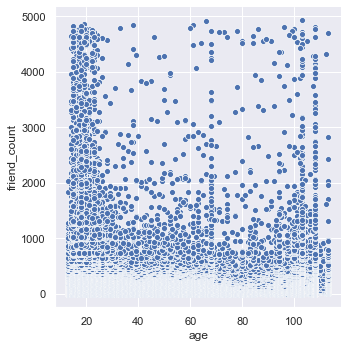

In [93]:
sb.relplot(x ="age", y ="friend_count",
            data = fbData)

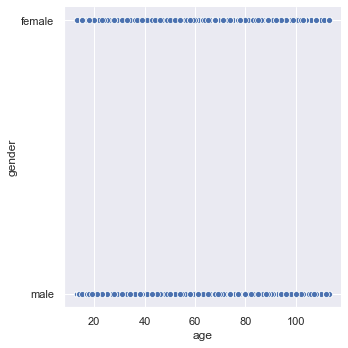

In [94]:
sb.relplot(x ="age", y ="gender",
            data = fbData)

In [95]:
##data = [15, 25, 25, 30, 5]
#labels = ['age', 'friend_count']

#define Seaborn color palette to use
#colors = sb.color_palette('pastel')[0:2]


#create pie chart
#plt.pie(fbData, labels = labels, colors = colors, autopct='%.0f%%')
#plt.show()

gender=fbData.groupby('gender')

In [77]:
gender

In [80]:
df_2030=fbData[(fbData['age']>=20 & fbData['age']<=30) & (fbData['gender']=='male')]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [28]:
w = widgets.IntSlider(min=10, max=1000)
t = widgets.FloatText()
display(w,t)
mylink = widgets.jslink((w,'userid'), (t, 'age')) #unlink


IntSlider(value=10, max=1000, min=10)

FloatText(value=0.0)

TypeError: No such trait: IntSlider.userid

In [ ]:
from ipywidgets import interactive, interact
from IPython.display import display
@interact
def show_userid(source=fbData[])

In [23]:
fbData.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000
